<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

--2023-09-11 20:21:01--  http://titanic.csv/
Resolving titanic.csv (titanic.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘titanic.csv’
--2023-09-11 20:21:01--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.007s  

2023-09-11 20:21:01 (7.90 MB/s) - ‘titanic.csv’ saved [61194/61194]

FINISHED --2023-09-11 20:21:01--
Total wall clock time: 0.3s
Downloaded: 1 files, 60K in 0.007s (7.90 MB/s)


### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv("titanic.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Nan,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [4]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df2 = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

In [6]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df2.dropna(subset=['Age'], inplace=True)

<ipython-input-6-126b46b2b227>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['Age'], inplace=True)


In [7]:
# Alumno: Fin de la limpieza, especifique cuantas filas se poseen para analizar
df.shape

(891, 12)

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [8]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df2.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0


<Axes: xlabel='Survived', ylabel='count'>

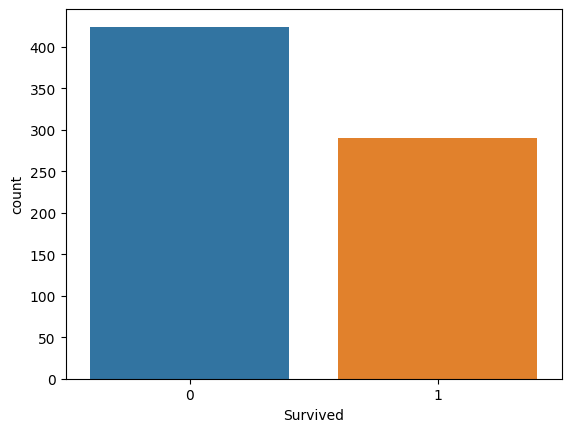

In [ ]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó
sns.countplot(data = df2, x = 'Survived')

<Axes: xlabel='Survived', ylabel='count'>

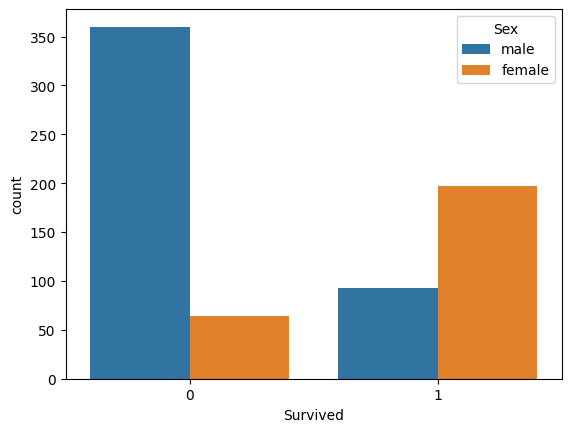

In [ ]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

sns.countplot(data = df2, x = 'Survived', hue='Sex')

<Axes: xlabel='Pclass', ylabel='count'>

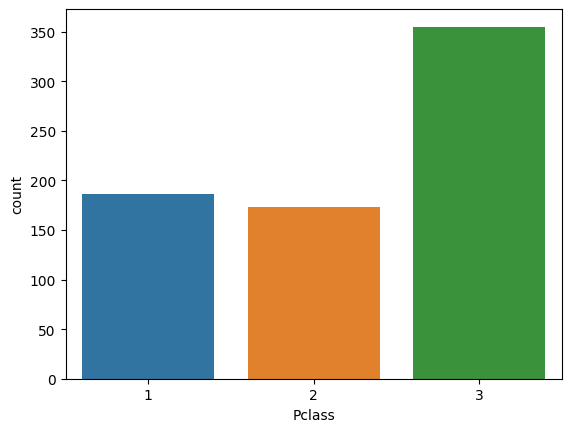

In [ ]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot

sns.countplot(data = df2, x = 'Pclass')

<Axes: xlabel='Pclass', ylabel='count'>

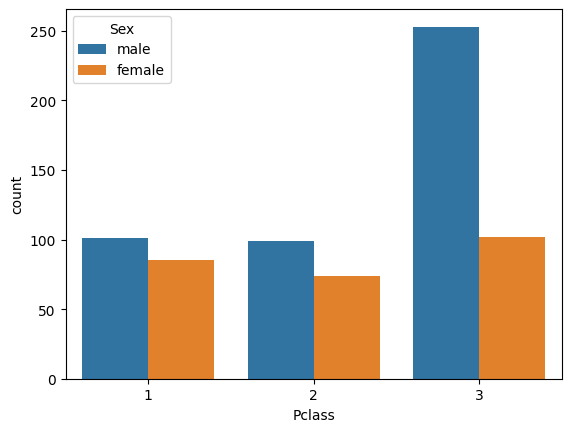

In [ ]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

sns.countplot(data = df2, x = 'Pclass', hue = 'Sex')

#### Transformar variables categóricas texto a clases numeradas

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df2.copy()

In [11]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!

le = LabelEncoder()
label_encoding = le.fit_transform(df_cod['Sex'])
df_cod['Sex_LE'] = label_encoding
df_cod.drop('Sex', axis=1, inplace=True)
df_cod.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_LE
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [ ]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
print(le.classes_)

['female' 'male']


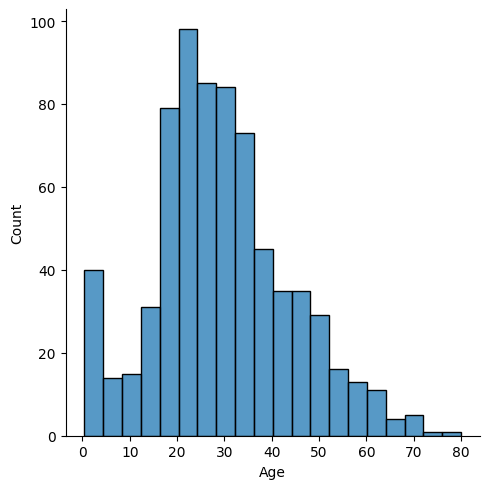

In [ ]:
# Alumno: Analizar la distribución de la edad
sns.displot(data=df_cod, x='Age')

In [12]:
# Alumno: utilizar StandarScaler para normalizar la column de "Age"
# Conservar el scaler que lo necesitará para el final

from sklearn.preprocessing import StandardScaler

df_norm = df_cod.copy()

age_scaler = StandardScaler()
df_norm.loc[:, 'Age'] = age_scaler.fit_transform(df_cod[['Age']].values)

df_norm.head(2)

,Survived,Pclass,Age,SibSp,Parch,Sex_LE
0,0,3,-0.530377,1,0,1
1,1,1,0.571831,1,0,0


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [13]:
# Alumno: genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived

X = df_norm.drop('Survived', axis=1).values
y = df_norm['Survived'].values

In [14]:
# Alumno: obtener la cantidad de features (cantidad de columnas)
# y almacenar en in_shape
in_shape = X.shape[1]
in_shape

5

In [15]:
# Alumno: crear una variable out_shape indicando cuandas neuronas de salida desea
out_shape = 1

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [16]:
# Alumno, generar los dataset de train y test superando en 80%20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from keras.layers import Dense
# Alumno: crear un modelo secuencial de dos capas (hidden y output).
# Coloque correctamente el valor de in_shape y out_shape en el modelo
# pero seleccione por su cuenta la cantidad de neuronas en la capa oculta

def create_model(input_size, hidden_neurons, output_size):

  model = Sequential()
  model.add(Dense(units=hidden_neurons, activation='sigmoid', input_shape=(input_size,)))
  model.add(Dense(units=output_size, activation='sigmoid'))

  return model

In [18]:
# Alumno: compilar el modelo con binary_crossentropy y métrica de "accuracy"
model = create_model(in_shape, 64, out_shape)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
# Alumno: entrenar el modelo, seleccionar un 20% para el dataset de validacion
# Queda a su gusto seleccionar la cantidad de épocas
# Almacenar la salida del fit en una variable "history"

history = model.fit(X_train, y_train, validation_split=0.2 , epochs=50, batch_size=32)

Epoch 1/50
15/15 [==============================] - 7s 17ms/step - loss: 0.7408 - accuracy: 0.4956 - val_loss: 0.7054 - val_accuracy: 0.5478
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.6336 - accuracy: 0.6140 - val_loss: 0.6325 - val_accuracy: 0.6522
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.6010 - accuracy: 0.7171 - val_loss: 0.6231 - val_accuracy: 0.6435
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5763 - accuracy: 0.6732 - val_loss: 0.6099 - val_accuracy: 0.6522
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5563 - accuracy: 0.7610 - val_loss: 0.5840 - val_accuracy: 0.7304
Epoch 6/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5367 - accuracy: 0.7697 - val_loss: 0.5750 - val_accuracy: 0.7217
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.5198 - accuracy: 0.7917 - val_loss: 0.5468 - val_accuracy: 0.7478
Epoch 8/50
15/15 [=

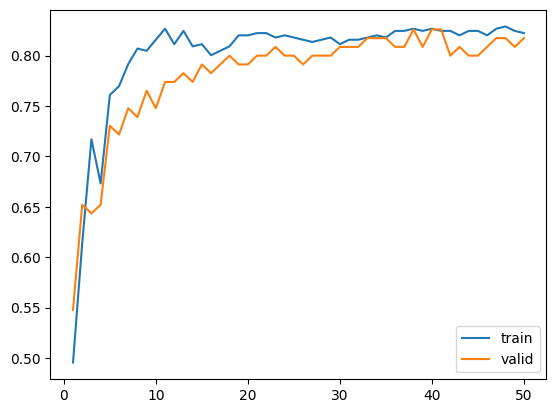

In [20]:
# Alumno: Graficar la evolución del accuracy durante el entrenamiento
# tanto para el dataset de train y el de valid en un gráfico
# plot line

epocas_conteo= range(1, len(history.history['accuracy']) + 1)

sns.lineplot(x=epocas_conteo,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epocas_conteo,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [21]:
# Alumno: obtener la probabilidad de sobreviir (y_hat_prob)
# realizando una prediccion (predict) con el dataset de test

y_hat_prob = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [22]:
# Alumno: transformar las probabilidads en 0 y 1, si la probabilidad es
# mayor o igual a 0.5 definir que la persona sobrevivió (1)
# Estos valores guardarlos en y_hat

y_hat = [1 if x >= 0.5 else 0 for x in y_hat_prob]

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [23]:
# Alumno, calcular la exactitud (accuracy) de su modelo
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_hat, normalize=True)

0.7692307692307693

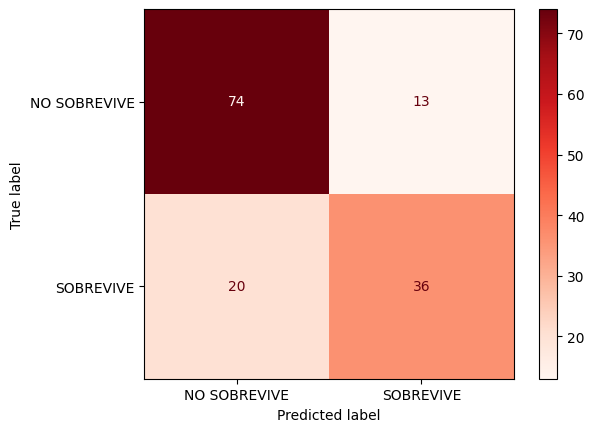

In [24]:
# Alumno, dibujar la matriz de confusion
# definir display_labels=['NO SOBREVIVE', 'SOBREVIVE']
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=['NO SOBREVIVE', 'SOBREVIVE'])
cmd.plot(cmap=plt.cm.Reds)

plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [28]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
# Recordar que los datos de edad (Age) se normalizaron, debe utilizar ese
# scaler generado para transformarlo

df2.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0


In [102]:
def df_pruebas(num_filas):

  pclass_values = np.random.randint(1, 4, size=num_filas)
  age_values = np.random.randint(1, 80, size=num_filas)
  sibsp_values = np.random.randint(0, 8, size=num_filas)
  parch_values = np.random.randint(0, 8, size=num_filas)
  sex_values = np.random.choice(['male', 'female'], size=num_filas)

  col = {
            'Pclass': pclass_values,
            'Sex': sex_values,
            'Age': age_values,
            'SibSp': sibsp_values,
            'Parch': parch_values,
            }

  pruebas = pd.DataFrame(col)

  label_encoding = le.fit_transform(pruebas['Sex'])
  pruebas['Sex_LE'] = label_encoding
  pruebas.drop('Sex', axis=1, inplace=True)

  age_scaler = StandardScaler()
  pruebas.loc[:, 'Age'] = age_scaler.fit_transform(pruebas[['Age']].values)

  return pruebas

pruebas = df_pruebas(5)
pruebas.head()

,Pclass,Age,SibSp,Parch,Sex_LE
0,1,1.273989,3,4,1
1,3,0.049000,1,2,1
2,2,-0.930992,1,2,0
3,2,0.906493,1,4,1
4,2,-1.298489,6,3,1


In [103]:
X_prueba = pruebas.values
X_prueba

array([[ 1.        ,  1.27398949,  3.        ,  4.        ,  1.        ],
       [ 3.        ,  0.0489996 ,  1.        ,  2.        ,  1.        ],
       [ 2.        , -0.93099232,  1.        ,  2.        ,  0.        ],
       [ 2.        ,  0.90649252,  1.        ,  4.        ,  1.        ],
       [ 2.        , -1.29848929,  6.        ,  3.        ,  1.        ]])

In [106]:
prediccion = model.predict(X_prueba)
prediccion1 = np.argmax(prediccion,axis=1)
prediccion1

1/1 [==============================] - 0s 19ms/step


array([0, 0, 0, 0, 0])

In [107]:
resultado = [1 if x >= 0.5 else 0 for x in prediccion]
resultado

[0, 0, 1, 0, 0]